# 영상개선함수들

참고자료 https://www.tutorialspoint.com/dip/gray_level_transformations.htm

## A. Negative transformation
s = (L - 1) - r

s와 r은 각 픽셀 값
L은 최대레벨 보통 2^8 256

black과 white를 바꿔준다.

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# 이미지 읽기
img = cv2.imread('./coin/coin1.bmp', cv2.IMREAD_GRAYSCALE)

# negative transformation
result_img = 255 - img

# 이미지 보여주기
cv2.imshow('input image', img)
cv2.imshow('negative img ', result_img)

# 이미지 보여주는 창 종료
cv2.waitKey(0)
cv2.destroyAllWindows()

## B. Log, inverse-log transformation
log : s = c log(r + 1), c는 상수

inverse log : s = e^(r/c) -1 

1을 더해주는 이유는 log 0 이면 무한대로 가기 때문이다.

좁은 지역의 값들을 넓은 이미지의 값들로 바꿔줌

In [4]:
# 이미지 읽기
img = cv2.imread('./logimage.jpg', cv2.IMREAD_GRAYSCALE)

# log transformation
# c = 30일 때
result_img = 30 * np.uint8(np.log1p(img))

# 이미지 보여주기
cv2.imshow('input image', img)
cv2.imshow('log-transformation img ', result_img)

# 이미지 보여주는 창 종료
cv2.waitKey(0)
cv2.destroyAllWindows()

#inverse-log transformation
result_img = np.uint8((np.exp(img / 30) - 1))

# 이미지 보여주기
cv2.imshow('input image', img)
cv2.imshow('inverse-log-transformation img ', result_img)

# 이미지 보여주는 창 종료
cv2.waitKey(0)
cv2.destroyAllWindows() 

# c 값을 다양하게 해보았는데 왜 안되는지 모르겟다 안되는지 알려주십쇼..

## C. Root, power transformation

s = cr^y

c 는 상수고 y 는 지수로 곱하는 것이다.


여기서 중요한 것은 다만 앞서 설명한 지수 법칙 변환의 입력 값 범위가 0부터 1 사이의 실숫값이기 때문에 영상의 그레이스케일 값에 적용하려면 적당한 크기로 스케일링을 해야 한다. 

픽셀의 그레이스케일 값이 k라면 입력 값은 k/255로 줄여서 입력하고, 출력 값은 다시 k×255 형태로 크기를 키워주어야 한다.

y가 1보다 작으면 밝아지고 1보다 크면 어두워진다!

In [ ]:
# 이미지 읽기
img = cv2.imread('./coin/coin1.bmp', cv2.IMREAD_GRAYSCALE)

result_img = np.uint8((1 * np.power(img/255, 2.0)) * 255)
result_img2 = np.uint8((1 * np.power(img/255, 0.1)) * 255) 

# 이미지 보여주기
cv2.imshow('input image', img)
cv2.imshow('2.0 gamma transformation img ', result_img)
cv2.imshow('0.1 gamma transformation img ', result_img2)

# 이미지 보여주는 창 종료
cv2.waitKey(0)
cv2.destroyAllWindows() 

## D. Histogram equalization

cv2함수중 eqaulizeHist를 사용하자

대조비가 개선된 것을 볼 수 있다.

픽셀 값도 출력해 보면 균일화 되어있다.

In [ ]:
# 이미지 읽기
img = cv2.imread('./coin/coin1.bmp', cv2.IMREAD_GRAYSCALE)

result_img = cv2.equalizeHist(img)

# 이미지 보여주기
cv2.imshow('input image', img)
cv2.imshow('histogram equalization img ', result_img)

# 이미지 보여주는 창 종료
cv2.waitKey(0)
cv2.destroyAllWindows() 

print(img)
print(result_img)

# Spatial Domain Filters
## A. salt pepper noise

스무딩 필터 여러가지를 적용해 보겠다.

참고자료 https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_filtering/py_filtering.html
### averaging filter 3 x 3 와 7 x 7 로 적용
sp noise는 제거된거 처럼 보이는데 그냥 흐리게 보인다..

필터 크기가 클수록 더 blurring된다.

In [ ]:
# 이미지 읽기
img = cv2.imread('./coin/coin1-spnoise3.bmp', cv2.IMREAD_GRAYSCALE)

result_img = cv2.blur(img,(3,3))
result_img2 = cv2.blur(img,(7,7))

# 이미지 보여주기(윈도우 크기 조절 가능)
cv2.namedWindow('input image', cv2.WINDOW_NORMAL) 
cv2.imshow('input image', img)
cv2.namedWindow('3 x 3 averaging filter img ', cv2.WINDOW_NORMAL) 
cv2.imshow('3 x 3 averaging filter img ', result_img)
cv2.namedWindow('7 x 7 averaging filter img ', cv2.WINDOW_NORMAL) 
cv2.imshow('7 x 7 averaging filter img ', result_img2)

# 이미지 보여주는 창 종료
cv2.waitKey(0)
cv2.destroyAllWindows() 

### gaussian blurring

솔트 페퍼 노이즈 같은 경우 averaging filter와 큰 차이가 없다

In [ ]:
# 이미지 읽기
img = cv2.imread('./coin/coin1-spnoise3.bmp', cv2.IMREAD_GRAYSCALE)

result_img = cv2.GaussianBlur(img,(3,3),0)
result_img2 = cv2.GaussianBlur(img,(7,7),0)

# 이미지 보여주기(윈도우 크기 조절 가능)
cv2.namedWindow('input image', cv2.WINDOW_NORMAL) 
cv2.imshow('input image', img)
cv2.namedWindow('3 x 3 gaussian filter img ', cv2.WINDOW_NORMAL) 
cv2.imshow('3 x 3 gaussian filter img ', result_img)
cv2.namedWindow('7 x 7 gaussian filter img ', cv2.WINDOW_NORMAL) 
cv2.imshow('7 x 7 gaussian filter img ', result_img2)

# 이미지 보여주는 창 종료
cv2.waitKey(0)
cv2.destroyAllWindows() 

### medianfilter 3 x 3, 7 x 7

솔트페퍼 노이즈에 제일 효과적인 필터링이다!

In [ ]:
# 이미지 읽기
img = cv2.imread('./coin/coin1-spnoise3.bmp', cv2.IMREAD_GRAYSCALE)

result_img = cv2.medianBlur(img, 3)
result_img2 = cv2.medianBlur(img, 7)

# 이미지 보여주기(윈도우 크기 조절 가능)
cv2.namedWindow('input image', cv2.WINDOW_NORMAL) 
cv2.imshow('input image', img)
cv2.namedWindow('3 x 3 median filter img ', cv2.WINDOW_NORMAL) 
cv2.imshow('3 x 3 median filter img ', result_img)
cv2.namedWindow('7 x 7 median filter img ', cv2.WINDOW_NORMAL) 
cv2.imshow('7 x 7 median filter img ', result_img2)

# 이미지 보여주는 창 종료
cv2.waitKey(0)
cv2.destroyAllWindows() 

## B. gaussian noise

참고자료
https://docs.opencv.org/3.4/d5/d69/tutorial_py_non_local_means.html

median filter와 새로 알게된 함수로 제거해보았다. 

median이 더 보존효과가 뛰어나지만

새로써본 함수가 노이즈제거는 더 탁월하다.

In [ ]:
# 이미지 읽기
img = cv2.imread('./coin/coin1-gaussian.bmp', cv2.IMREAD_COLOR)

#color image만 가능하다.
result_img = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)
result_img2 = cv2.medianBlur(img, 7)

# 이미지 보여주기(윈도우 크기 조절 가능)
cv2.namedWindow('input image', cv2.WINDOW_NORMAL) 
cv2.imshow('input image', img)
cv2.namedWindow('result_img ', cv2.WINDOW_NORMAL) 
cv2.imshow('result_img ', result_img)
cv2.namedWindow('median blur', cv2.WINDOW_NORMAL) 
cv2.imshow('median blur', result_img2)

# 이미지 보여주는 창 종료
cv2.waitKey(0)
cv2.destroyAllWindows() 

## C. Blurring -> Sharpening

참고자료 https://medium.com/@almutawakel.ali/opencv-filters-arithmetic-operations-2f4ff236d6aa

라플라시안 필터를 만들어서 적용하였다. 엣지가 선명해진것을 확인 할 수 있다.

In [6]:
# 이미지 읽기
img = cv2.imread('./coin/coin1-blur.bmp', cv2.IMREAD_COLOR)

# 샤프닝 필터(라플라시안 필터)
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])

# 필터 적용
result_img = cv2.filter2D(img, -1, kernel_sharpening)

# 이미지 보여주기(윈도우 크기 조절 가능)
cv2.namedWindow('input image', cv2.WINDOW_NORMAL) 
cv2.imshow('input image', img)
cv2.namedWindow('result_img', cv2.WINDOW_NORMAL) 
cv2.imshow('result_img', result_img)

# 이미지 보여주는 창 종료
cv2.waitKey(0)
cv2.destroyAllWindows() 

## D. low contrast

대조비에 대한 설명이 잘되어 있음

참고자료 : https://www.thephoblographer.com/2018/03/06/high-contrast-vs-low-contrast-black-and-white-photo-editing-whats-the-difference/

히스토그램 보여주기

참고자료 :https://docs.opencv.org/3.1.0/d1/db7/tutorial_py_histogram_begins.html

histogram equalization을 이용하면 된다.
영상개선함수 참조

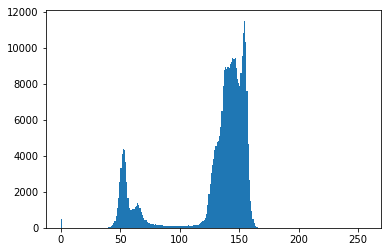

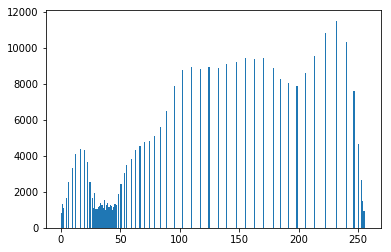

In [3]:
# 이미지 읽기
img = cv2.imread('./coin/coin1.bmp', cv2.IMREAD_GRAYSCALE)

result_img = cv2.equalizeHist(img)
plt.hist(img.ravel(),256,[0,256]); plt.show()
plt.hist(result_img.ravel(),256,[0,256]); plt.show()

# 이미지 보여주기
cv2.imshow('input image', img)
cv2.imshow('histogram equalization img ', result_img)

# 이미지 보여주는 창 종료
cv2.waitKey(0)
cv2.destroyAllWindows() 

## E. 여러가지 노이즈 복합 연산
1. 일단 salt & pepper noise median filter를 적용하여 제거

2. 영상이 전체적으로 어두워서 감마보정을 통해 밝게 해준다.
    
* histogram equalization 하면 대조비가 좋아지지만 동전을 구분하기에 좋지 않다. 대조비 개선의 나쁜 예

* 샤프닝을 하면 동전의 엣지가 더 잘보이지만 강조되어 울퉁불퉁하게 보인다.

In [37]:
# 이미지 읽기
img = cv2.imread('./coin/coin5-spnoise5.bmp', 0)

#color image만 가능하다.
result_img = cv2.medianBlur(img, 5)
result_img2 = np.uint8((1 * np.power(result_img/255, 0.5)) * 255) 

# 여기부터는 잘못된 필터 적용
# 샤프닝 필터(라플라시안 필터)
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])


# 필터 적용
result_img3 = cv2.filter2D(result_img2, -1, kernel_sharpening)
result_img4 = cv2.equalizeHist(result_img2)

# 이미지 보여주기(윈도우 크기 조절 가능)
cv2.namedWindow('input image', cv2.WINDOW_NORMAL) 
cv2.imshow('input image', img)
cv2.namedWindow('median filter', cv2.WINDOW_NORMAL) 
cv2.imshow('median filter', result_img)
cv2.namedWindow('gamma correction', cv2.WINDOW_NORMAL) 
cv2.imshow('gamma correction', result_img2)
cv2.namedWindow('shaepening filter', cv2.WINDOW_NORMAL) 
cv2.imshow('shaepening filter', result_img3)
cv2.namedWindow('histogram equalization', cv2.WINDOW_NORMAL) 
cv2.imshow('histogram equalization', result_img4)

# 이미지 보여주는 창 종료
cv2.waitKey(0)
cv2.destroyAllWindows() 

# 주파수 영역에서 영상개선

참고자료 : http://darkpgmr.tistory.com/171

푸리에 변환(Fourier transform)은 신호처리, 음성, 통신 분야에서 뿐만 아니라 영상처리에서도 매우 중요한 개념으로 다양한 응용을 가지고 있습니다. 영상을 주파수 성분으로 변환하여 다양한 분석 및 처리를 할 수 있고 임의의 필터링 연산을 fft(fast Fourier transform)를 이용하여 고속으로 구현할 수도 있습니다. 그리고 푸리에 변환과 같은 근원적인 이론들은 특정 응용에 국한되지 않기 때문에 한번 알아두면 분야를 떠나서 두고두고 도움이 됩니다.

푸리에 변환(Fourier transform)을 직관적으로 설명하면 푸리에 변환은 임의의 입력 신호를 다양한 주파수를 갖는 주기함수들의 합으로 분해하여 표현하는 것이다.

컴퓨터 비전(computer vision), 영상처리 쪽에서는 spatial domain에서 frequency domain으로의 변환이라고 부른다

푸리에 변환(Fourier transform)의 대단한 점은 입력 신호가 어떤 신호이든지 관계없이 임의의 입력 신호를 sin, cos 주기함수들의 합으로 항상 분해할 수 있다는 것이다.

푸리에 변환을 통해 얻어지는 F(u, v)는 복소수(complex number)이며 실수부(Real)와 허수부(Imaginary)로 구성된다 

이 때, 복소수 F(u, v)의 크기 |F(u, v)|를 푸리에 변환의 spectrum(스펙트럼) 또는 magnitude라고 부르고, F(u, v)의 각도 Φ를 phase(페이즈) angle 또는 phase spectrum이라고 부른다.

## A. 샘플이미지에 FFT 적용 + 
## B. FFT 적용 결과를 log scale해서 보여주기
참고자료 : https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html

푸리에 스펙트럼은 해당 주파수 성분이 원 신호(이미지)에 얼마나 강하게 포함되어 있는지를 나타낸다.

푸리에 스펙트럼은 저주파 영역은 매우 큰 값을 갖는 반면에 대부분의 다른 영역은 0에 가까운 값을 갖는다. 따라서 푸리에 스펙트럼을 그대로 이미지로 시각화하면 검은 바탕 위에 흰점 하나만 존재하는 형태가 된다.

위의 문제를 해결하기 위해스펙트럼에 log를 취하는 것이 일반적이다.

다음으로, 원래의 스펙트럼 이미지는 모서리로 갈수록 값이 높아지기 때문에 스펙트럼의 형태를 파악하기 힘들다.

따라서 이러한 문제를 해결하기 위해 원점이 중심(center)에 오도록 스펙트럼의 위치를 이동시킨(shift) 형태의 이미지를 사용하는 것이 일반적이다.

In [25]:
# 이미지 읽기
img = cv2.imread('./coin/coin1.bmp', cv2.IMREAD_GRAYSCALE)

#  cv2.dft() 결과의 실수 부분을 가지며 cv2.idft() 결과의 허수 부분을 갖습니다.
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
# 중심이동
dft_shift = np.fft.fftshift(dft)
# 중심이동 적용 후 log 변환후 결과값이 실수여서 uint8로 변환 
magnitude_spectrum = np.uint8(20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])))

# 이미지 보여주기
cv2.imshow('input image', img)
cv2.imshow('fft_log_scale', magnitude_spectrum)

# 이미지 보여주는 창 종료
cv2.waitKey(0)
cv2.destroyAllWindows() 

## C - 1. 다양한 cut off frequency의 LPF
lpf는 noise가 제거되고, smoothing(bluring)되는 효과가 있다.

cut-off-frequency가 낮을수록 더 blurring 된다.

참고자료 : https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Fourier_Transform_FFT_DFT.php


Text(0.5, 1.0, 'lpf image : cut-off-frequency 80')

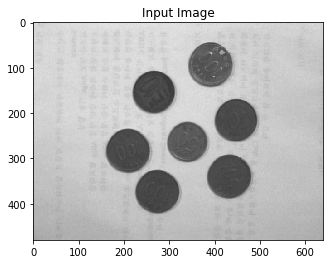

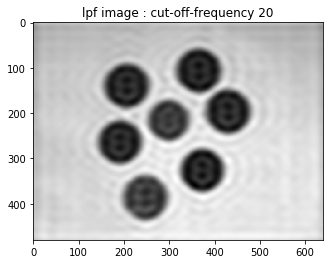

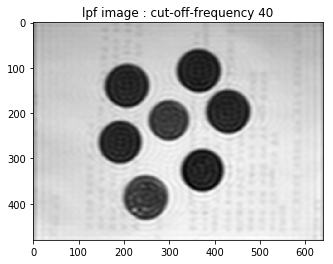

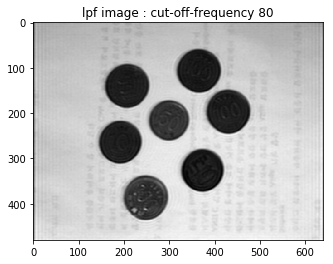

In [9]:
# 이미지 읽기
img = cv2.imread('./coin/coin1.bmp', cv2.IMREAD_GRAYSCALE)

# fft
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# low pass filter 
rows, cols = img.shape
crow, ccol = rows // 2 , cols // 2     # center

# create a mask first, center square is 1, remaining all zeros
lpf_mask20 = np.zeros((rows, cols, 2), np.uint8)
lpf_mask20[crow - 20 : crow + 20, ccol - 20 : ccol+ 20] = 1

lpf_mask40 = np.zeros((rows, cols, 2), np.uint8)
lpf_mask40[crow - 40 : crow + 40, ccol - 40 : ccol+ 40] = 1

lpf_mask80 = np.zeros((rows, cols, 2), np.uint8)
lpf_mask80[crow - 80 : crow + 80, ccol - 80 : ccol+ 80] = 1

#inverse fft 적용
temp_shift_1= dft_shift * lpf_mask20
result_1 = cv2.idft(temp_shift_1)
result_1 = cv2.magnitude(result_1[:, :, 0], result_1[:, :, 1])

temp_shift_2= dft_shift * lpf_mask40
result_2 = cv2.idft(temp_shift_2)
result_2 = cv2.magnitude(result_2[:, :, 0], result_2[:, :, 1])

temp_shift_3= dft_shift * lpf_mask80
result_3 = cv2.idft(temp_shift_3)
result_3 = cv2.magnitude(result_3[:, :, 0], result_3[:, :, 1])



# cv2 내장함수인 imshow로 출력이 잘 되지않는 관계로 matplot 라이브러리를 사용하여 출력하겠다.
plt.figure(1)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image')
plt.figure(2)
plt.imshow(result_1, cmap = 'gray')
plt.title('lpf image : cut-off-frequency 20')
plt.figure(3)
plt.imshow(result_2, cmap = 'gray')
plt.title('lpf image : cut-off-frequency 40')
plt.figure(4)
plt.imshow(result_3, cmap = 'gray')
plt.title('lpf image : cut-off-frequency 80')

## C - 2. 다양한 cut off frequency의 HPF
hpf는 영상이 급격히 변하는 부분이 high frequency에 해당된다. 즉, 엣지에 해당됨

edge detection이나 sharpening효과에 쓰인다.

Text(0.5, 1.0, 'hpf image : cut-off-frequency 80')

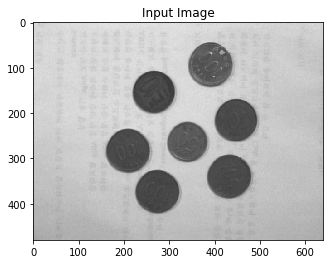

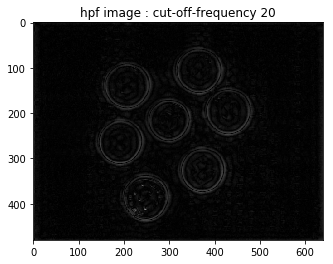

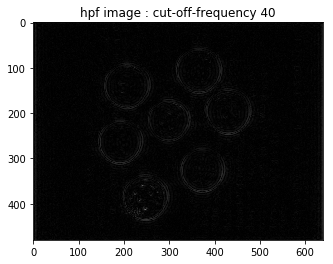

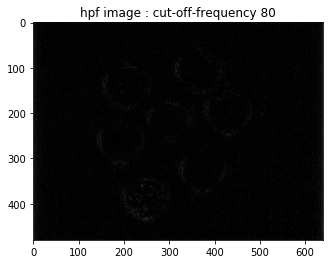

In [13]:
# 이미지 읽기
img = cv2.imread('./coin/coin1.bmp', cv2.IMREAD_GRAYSCALE)

# fft
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# low pass filter 
rows, cols = img.shape
crow, ccol = rows // 2 , cols // 2     # center


# create a mask first, center square is 1, remaining all zeros
lpf_mask20 = np.zeros((rows, cols, 2), np.uint8)
lpf_mask20[crow - 20 : crow + 20, ccol - 20 : ccol+ 20] = 1
hpf_mask20 = 1 -lpf_mask20

lpf_mask40 = np.zeros((rows, cols, 2), np.uint8)
lpf_mask40[crow - 40 : crow + 40, ccol - 40 : ccol+ 40] = 1
hpf_mask40 = 1 -lpf_mask40


lpf_mask80 = np.zeros((rows, cols, 2), np.uint8)
lpf_mask80[crow - 80 : crow + 80, ccol - 80 : ccol+ 80] = 1
hpf_mask80 = 1 - lpf_mask80


#inverse fft 적용
temp_shift_1= dft_shift * hpf_mask20
result_1 = cv2.idft(temp_shift_1)
result_1 = cv2.magnitude(result_1[:, :, 0], result_1[:, :, 1])

temp_shift_2= dft_shift * hpf_mask40
result_2 = cv2.idft(temp_shift_2)
result_2 = cv2.magnitude(result_2[:, :, 0], result_2[:, :, 1])

temp_shift_3= dft_shift * hpf_mask80
result_3 = cv2.idft(temp_shift_3)
result_3 = cv2.magnitude(result_3[:, :, 0], result_3[:, :, 1])



# cv2 내장함수인 imshow로 출력이 잘 되지않는 관계로 matplot 라이브러리를 사용하여 출력하겠다.
plt.figure(1)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image')
plt.figure(2)
plt.imshow(result_1, cmap = 'gray')
plt.title('hpf image : cut-off-frequency 20')
plt.figure(3)
plt.imshow(result_2, cmap = 'gray')
plt.title('hpf image : cut-off-frequency 40')
plt.figure(4)
plt.imshow(result_3, cmap = 'gray')
plt.title('hpf image : cut-off-frequency 80')

# C - 3. High-Frequency Emphasis Filtering
 high pass filter와 비슷하게 high-frequency인 엣지부분을 강조하는 효과가 있다
 
 hfef는 엣지부분말고도 기존 이미지를 보존해주고 background와 구분할 때 용이할 것 같다.
 
 참고자료 : https://123machinelearn.wordpress.com/2017/12/25/image-enhancement-using-high-frequency-emphasis-filtering-and-histogram-equalization/
![title](hfef.jpg)

Text(0.5, 1.0, 'hpf image : cut-off-frequency 80')

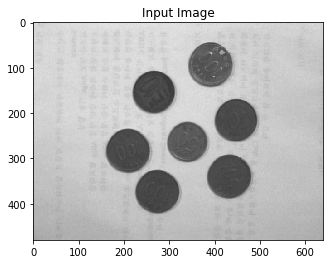

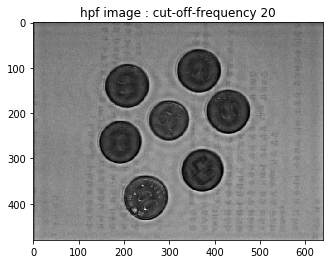

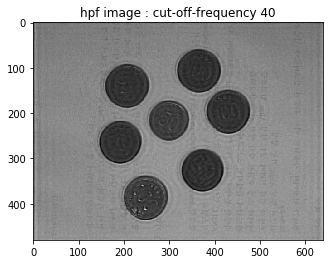

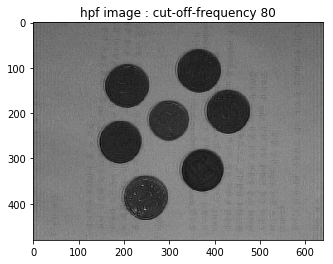

In [17]:
# 이미지 읽기
img = cv2.imread('./coin/coin1.bmp', cv2.IMREAD_GRAYSCALE)

# fft
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# low pass filter 
rows, cols = img.shape
crow, ccol = rows // 2 , cols // 2     # center

# create a mask first, center square is 1, remaining all zeros
# a = 0.5, b= 0.75로 설정
lpf_mask20 = np.zeros((rows, cols, 2), np.uint8)
lpf_mask20[crow - 20 : crow + 20, ccol - 20 : ccol+ 20] = 1
hpf_mask20 = 1 -lpf_mask20
hfef_mask20 = 0.5 + (hpf_mask20 * 0.75)


lpf_mask40 = np.zeros((rows, cols, 2), np.uint8)
lpf_mask40[crow - 40 : crow + 40, ccol - 40 : ccol+ 40] = 1
hpf_mask40 = 1 -lpf_mask40
hfef_mask40 = 0.5 + (hpf_mask40 * 0.75)

lpf_mask80 = np.zeros((rows, cols, 2), np.uint8)
lpf_mask80[crow - 80 : crow + 80, ccol - 80 : ccol+ 80] = 1
hpf_mask80 = 1 - lpf_mask80
hfef_mask80 = 0.5 + (hpf_mask80 * 0.75)


#inverse fft 적용
temp_shift_1= dft_shift * hfef_mask20
result_1 = cv2.idft(temp_shift_1)
result_1 = cv2.magnitude(result_1[:, :, 0], result_1[:, :, 1])

temp_shift_2= dft_shift * hfef_mask40
result_2 = cv2.idft(temp_shift_2)
result_2 = cv2.magnitude(result_2[:, :, 0], result_2[:, :, 1])

temp_shift_3= dft_shift * hfef_mask80
result_3 = cv2.idft(temp_shift_3)
result_3 = cv2.magnitude(result_3[:, :, 0], result_3[:, :, 1])



# cv2 내장함수인 imshow로 출력이 잘 되지않는 관계로 matplot 라이브러리를 사용하여 출력하겠다.
plt.figure(1)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image')
plt.figure(2)
plt.imshow(result_1, cmap = 'gray')
plt.title('hpf image : cut-off-frequency 20')
plt.figure(3)
plt.imshow(result_2, cmap = 'gray')
plt.title('hpf image : cut-off-frequency 40')
plt.figure(4)
plt.imshow(result_3, cmap = 'gray')
plt.title('hpf image : cut-off-frequency 80')